# Imports

In [111]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import sys
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sys.path.append(os.getcwd() + '/refi')
import retirement_analysis as ra
import constants
#import asset
#import consumption
#import inflation
import portfolio as pf

import series.base_series as base_series
from series.consumption import StaticRetirementConsumption
from series.ssb import StaticRetirementSSB
from series.deferral import StaticPreRetirementDeferral

# Constants

In [162]:
initial_balance = 400000
initial_cpi = 275
initial_age = 30
initial_deferral = 19500
retirement_age = 60
retirement_consumption = 75000
retirement_ssb = 10000
benefits_age = 67
death_age = 100

In [149]:
num_years = death_age - initial_age + 1

In [150]:
geo_mean_equity_return = .065
geo_mean_bond_return = .035
geo_mean_cash_return = .002

geo_mean_inflation = .02


# Set up Series

In [163]:
equity = base_series.StaticSeries(num_years, geo_mean_equity_return)
bond = base_series.StaticSeries(num_years, geo_mean_bond_return)
cash = base_series.StaticSeries(num_years, geo_mean_cash_return)

In [164]:
assets = [equity, bond, cash]
balance = initial_balance
glidepath = constants.fidelity_glidepath

In [165]:
portfolio = pf.Portfolio(assets, glidepath, balance)

In [166]:
inflation = base_series.StaticSeries(num_years, geo_mean_inflation)

In [167]:
cpi = base_series.StaticGrowthSeries(initial_value=100, growth_series=inflation)

In [168]:
consumption = StaticRetirementConsumption(retirement_consumption, cpi, initial_age, retirement_age)

In [169]:
deferral = StaticPreRetirementDeferral(initial_deferral, cpi, initial_age, retirement_age)

In [170]:
ssb = StaticRetirementSSB(retirement_ssb, cpi, initial_age, benefits_age)

# Ret Analysis

In [171]:
retirement_analysis = ra.RetirementAnalysis(
    initial_age=initial_age,
    retirement_age=retirement_age,
    death_age=death_age,
    portfolio=portfolio,
    deferral_scenario=deferral,
    consumption_scenario=consumption,
    inflation_scenario=inflation,
    cpi_scenario=cpi,
    ssb_scenario=ssb)

In [172]:
retirement_analysis.simulate()

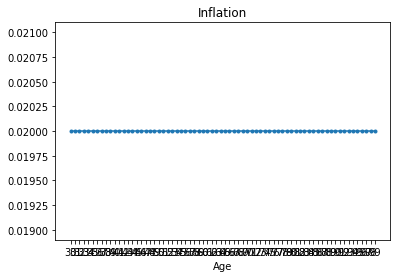

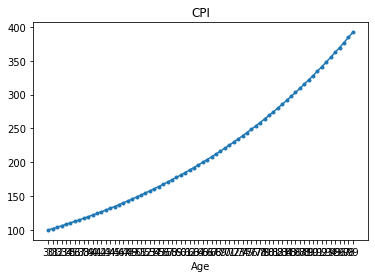

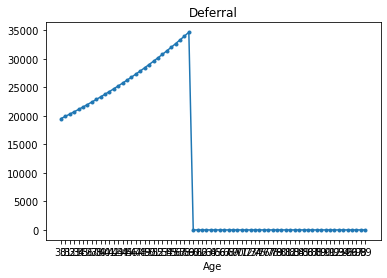

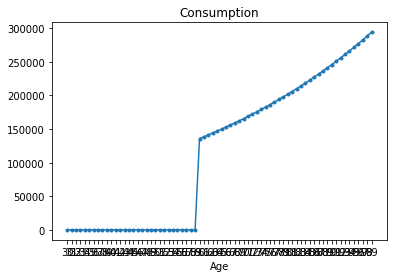

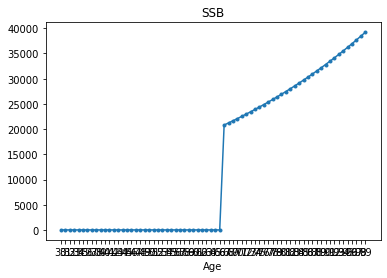

In [174]:
retirement_analysis.plot()

In [141]:
np.where(retirement_analysis.deferral_scenario.history == 0)

(array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
        47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
        64, 65, 66, 67, 68, 69]),)

In [147]:
retirement_analysis.deferral_scenario.history

array([19500.        , 19890.        , 20287.8       , 20693.556     ,
       21107.42712   , 21529.5756624 , 21960.16717565, 22399.37051916,
       22847.35792954, 23304.30508814, 23770.3911899 , 24245.7990137 ,
       24730.71499397, 25225.32929385, 25729.83587973, 26244.43259732,
       26769.32124927, 27304.70767425, 27850.80182774, 28407.81786429,
       28975.97422158, 29555.49370601, 30146.60358013, 30749.53565173,
       31364.52636477, 31991.81689206, 32631.6532299 , 33284.2862945 ,
       33949.97202039, 34628.9714608 ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
      

In [146]:
retirement_analysis.consumption_scenario.history

array([     0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        , 226420.19801292, 230948.60197318,
       235567.57401264, 240278.92549289, 245084.50400275, 249986.19408281,
       254985.91796446, 260085.63632375, 265287.34905023, 270593.09603123,
       276004.95795186, 281525.05711089, 287155.55825311, 292898.66941817,
       298756.64280654, 304731.77566267, 310826.41117592, 317042.93939944,
       323383.79818743, 329851.47415118, 336448.5036342 , 343177.47370688,
       350041.02318102, 3

In [145]:
retirement_analysis.portfolio.history[29:31] / retirement_analysis.portfolio.history[28:30]

array([1.06875221, 1.0587396 ])

In [102]:
np.where(np.isnan(retirement_analysis.portfolio.total_returns))

(array([29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
        46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62,
        63, 64, 65, 66, 67, 68, 69, 70]),)

In [104]:
retirement_analysis.portfolio.glidepath[27]

[0.856, 0.1296, 0.0144]

In [117]:
retirement_analysis.portfolio.hist_pf_returns

array([0.06167, 0.06167])

In [118]:
retirement_analysis.portfolio.balance

493953.1840435499

In [124]:
ages = np.array([age for age in np.arange(retirement_analysis.initial_age, retirement_analysis.death_age + 1)])

In [125]:
ages

array([ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100])

In [105]:
retirement_analysis.deferral_scenario.history

array([19500.        , 19890.        , 20287.8       , 20693.556     ,
       21107.42712   , 21529.5756624 , 21960.16717565, 22399.37051916,
       22847.35792954, 23304.30508814, 23770.3911899 , 24245.7990137 ,
       24730.71499397, 25225.32929385, 25729.83587973, 26244.43259732,
       26769.32124927, 27304.70767425, 27850.80182774, 28407.81786429,
       28975.97422158, 29555.49370601, 30146.60358013, 30749.53565173,
       31364.52636477, 31991.81689206, 32631.6532299 , 33284.2862945 ,
       33949.97202039, 34628.9714608 ,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
      

In [106]:
retirement_analysis.consumption_scenario.history

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan])

In [107]:
inflation.history

array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan])

In [108]:
cpi.history

array([100.        , 102.        , 104.04      , 106.1208    ,
       108.243216  , 110.40808032, 112.61624193, 114.86856676,
       117.1659381 , 119.50925686, 121.899442  , 124.33743084,
       126.82417946, 129.36066305, 131.94787631, 134.58683383,
       137.27857051, 140.02414192, 142.82462476, 145.68111725,
       148.5947396 , 151.56663439, 154.59796708, 157.68992642,
       160.84372495, 164.06059945, 167.34181144, 170.68864766,
       174.10242062, 177.58446903,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,       

In [110]:
inflation

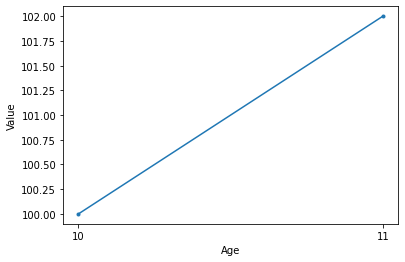

In [159]:
c.plot(initial_age=10)

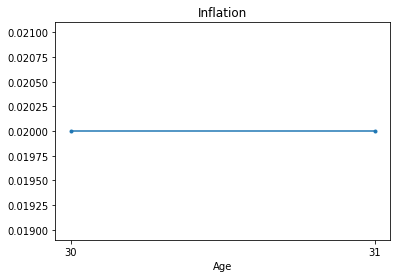

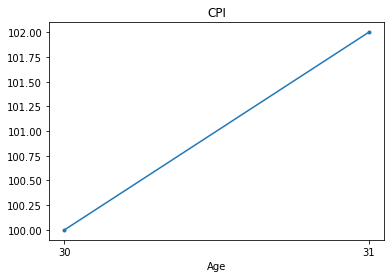

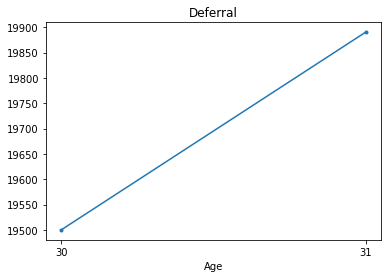

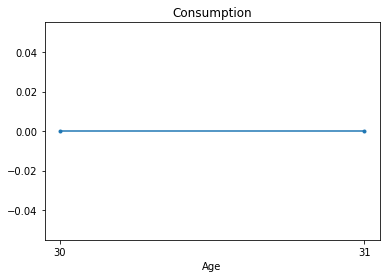

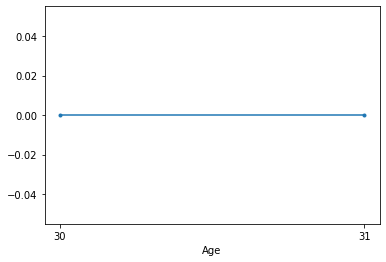

In [165]:
retirement_analysis.plot()